In [1]:
import pandas as pd
import numpy as np
import re  

names_file = "communities.names"
column_names = []
df = pd.read_csv("communities.data", names=column_names, header=None, na_values="?")

In [2]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [3]:
# 读取 communities.names 文件，逐行打印
names_file = "communities.names"

with open(names_file, "r") as f:
    lines = f.readlines()

print(f"📌 `communities.names` 文件总行数: {len(lines)} 行")


📌 `communities.names` 文件总行数: 522 行


In [4]:
# **打印整个文件内容**
print("\n===== `communities.names` 文件内容 =====")
for i, line in enumerate(lines):
    print(f"{i+1}: {line.strip()}")  # 显示行号，避免文件太长不容易看


===== `communities.names` 文件内容 =====
1: Title: Communities and Crime
2: 
3: Abstract: Communities within the United States. The data combines socio-economic data
4: from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime
5: data from the 1995 FBI UCR.
6: 
7: -----------------------------------------------------------------------------------------
8: 
9: Data Set Characteristics:  Multivariate
10: Attribute Characteristics: Real
11: Associated Tasks: Regression
12: Number of Instances: 1994
13: Number of Attributes: 128
14: Missing Values? Yes
15: Area: Social
16: Date Donated: 2009-07-13
17: 
18: -----------------------------------------------------------------------------------------
19: 
20: Source:
21: 
22: Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle
23: University; Philadelphia, PA, 19141, USA
24: -- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law
25: Enforcement Management and Administrat

In [5]:
import re

names_file = "communities.names"
column_names = []

with open(names_file, "r") as f:
    for line in f:
        line = line.strip()

        # 只处理 "@attribute" 开头的行
        if line.startswith("@attribute"):
            column_name = line.split()[1].strip()  # 提取 `@attribute` 后的列名

            # **清理列名**
            column_name = re.sub(r"[^a-zA-Z0-9_]", "", column_name)  # 只保留字母、数字、下划线
            column_name = column_name.replace("-", "").replace(" ", "_")  # 去掉空格、特殊符号

            column_names.append(column_name)

# **打印最终提取的列名**
print(f"📌 提取到 {len(column_names)} 个列名")
print("前 10 个列名:", column_names[:10])

📌 提取到 128 个列名
前 10 个列名: ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian']


In [6]:
df_temp = pd.read_csv("communities.data", header=None, na_values="?")
print(f"📌 `communities.data` 文件实际有 {df_temp.shape[1]} 列")

📌 `communities.data` 文件实际有 128 列


In [7]:
df = pd.read_csv("communities.data", names=column_names, header=None, na_values="?")

# 确认 DataFrame 形状
#print(f"📌 数据形状: {df.shape}")  # 应该是 (1994, 128)
#print(df.head())

In [8]:
print(df.select_dtypes(include=['object']).columns)

Index(['communityname'], dtype='object')


In [9]:
df['communityname'] = df['communityname'].astype(str)
df.head()
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

In [10]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [11]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

county                  1174
community               1177
OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64


In [12]:
print(df["ViolentCrimesPerPop"].describe())
print(df["ViolentCrimesPerPop"].isnull().sum())  # 检查 NaN 数量
print(df["ViolentCrimesPerPop"].unique())  # 看看是否有非数值的异常值

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64
0
[0.2  0.67 0.43 0.12 0.03 0.14 0.55 0.53 0.15 0.24 0.08 0.06 0.09 0.21
 0.3  0.49 0.07 0.34 0.69 0.63 0.31 0.84 0.1  0.02 0.16 0.19 0.11 0.22
 0.13 0.8  0.17 0.68 0.23 0.05 0.28 0.57 0.37 0.61 0.5  0.04 0.18 0.7
 0.75 1.   0.   0.27 0.4  0.45 0.39 0.44 0.26 0.56 0.51 0.86 0.62 0.38
 0.87 0.73 0.48 0.25 0.46 0.83 0.36 0.01 0.41 0.42 0.29 0.66 0.74 0.88
 0.32 0.54 0.93 0.59 0.35 0.58 0.6  0.76 0.71 0.72 0.64 0.33 0.78 0.91
 0.52 0.85 0.82 0.89 0.94 0.65 0.81 0.95 0.9  0.47 0.79 0.97 0.77 0.96]


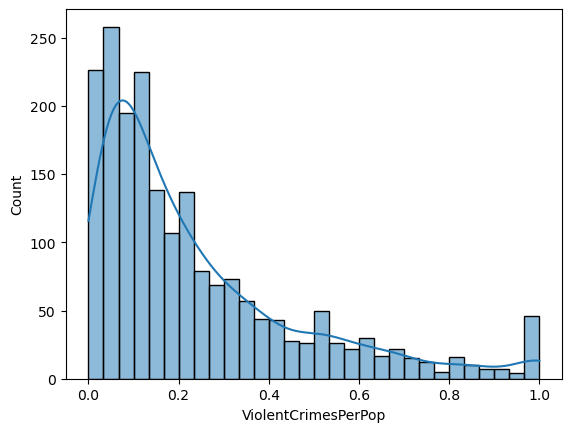

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["ViolentCrimesPerPop"].dropna(), kde=True, bins=30)
plt.show()


In [14]:
df.shape

(1994, 128)

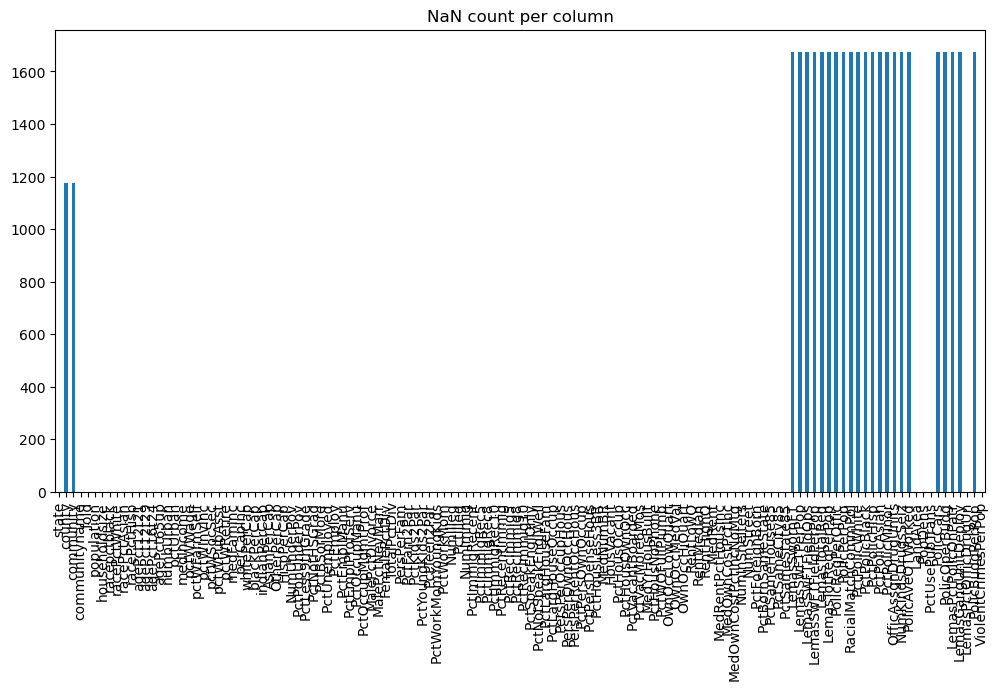

In [15]:
import matplotlib.pyplot as plt

df.isnull().sum().plot(kind="bar", figsize=(12, 6))
plt.title("NaN count per column")
plt.show()

In [16]:
threshold = 1000  # 设置阈值
cols_to_drop = df.isnull().sum()[df.isnull().sum() > threshold].index  # 获取需要删除的列名
df_cleaned = df.drop(columns=cols_to_drop)  # 删除这些列

print(f"delect {len(cols_to_drop)} ，rest of column {df_cleaned.shape[1]} ")

delect 24 ，rest of column 104 


In [17]:
num_rows_with_nan = df.isnull().any(axis=1).sum()
print(f"包含缺失值的行数: {num_rows_with_nan}")
num_empty_rows = df.isnull().all(axis=1).sum()
print(f"完全空的行数: {num_empty_rows}")

包含缺失值的行数: 1871
完全空的行数: 0


In [18]:
df["missing_count"] = df.isnull().sum(axis=1)
df_sorted = df.sort_values("missing_count", ascending=False)
print(df_sorted[["missing_count"]].head(10))  # 查看前10行

      missing_count
130              25
997              24
758              24
1367             24
763              24
1369             24
761              24
760              24
759              24
757              24


In [19]:
df["crime_category"] = pd.qcut(df["ViolentCrimesPerPop"], q=3, labels=["Low", "Medium", "High"])

In [20]:
# 计算每行（社区）的缺失率
df["missing_ratio"] = df["missing_count"] / df.shape[1]  # 除以总特征数

# 定义缺失率区间（10%, 20%, ..., 90%）
bins = np.arange(0, 1.1, 0.1)  # [0%, 10%, ..., 100%]
df["missing_bin"] = pd.cut(df["missing_ratio"], bins, labels=[f"{int(i*100)}%" for i in bins[:-1]])

# 查看不同缺失率区间的社区数量
print(df["missing_bin"].value_counts().sort_index())

# 按区间计算目标变量均值
grouped = df.groupby("missing_bin")["ViolentCrimesPerPop"].mean()
print(grouped)

0%      196
10%    1675
20%       0
30%       0
40%       0
50%       0
60%       0
70%       0
80%       0
90%       0
Name: missing_bin, dtype: int64
missing_bin
0%     0.478010
10%    0.199278
20%         NaN
30%         NaN
40%         NaN
50%         NaN
60%         NaN
70%         NaN
80%         NaN
90%         NaN
Name: ViolentCrimesPerPop, dtype: float64


missing_bin      0%  10%  20%  30%  40%  50%  60%  70%  80%  90%
crime_category                                                  
Low               7  656    0    0    0    0    0    0    0    0
Medium           47  579    0    0    0    0    0    0    0    0
High            142  440    0    0    0    0    0    0    0    0


<Axes: xlabel='crime_category'>

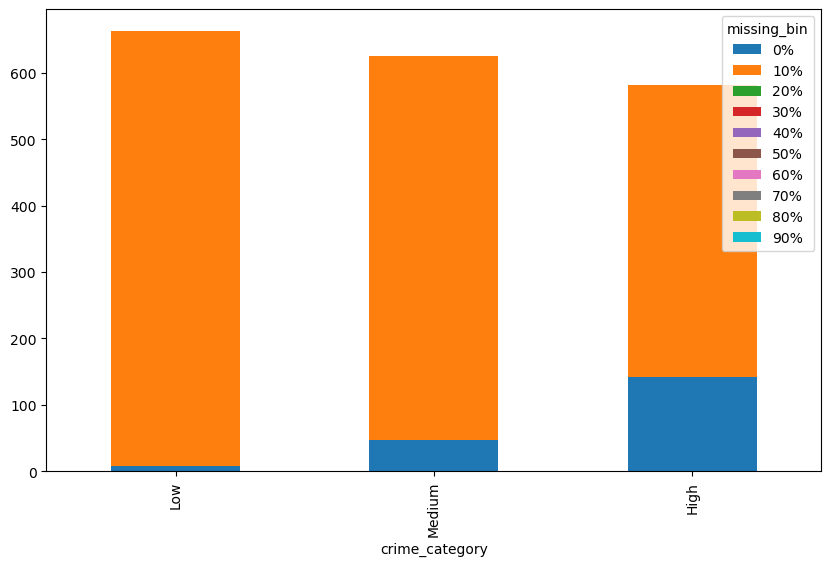

In [21]:
crime_missing = df.groupby(["crime_category", "missing_bin"]).size().unstack()
print(crime_missing)
crime_missing.plot(kind="bar", stacked=True, figsize=(10,6))

In [22]:
missing_values1 = df_cleaned.isnull().sum()
missing_values1 = missing_values[missing_values > 0]  # 只显示有缺失值的列
print(missing_values1)

county                  1174
community               1177
OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64


In [23]:
df_cleaned.fillna(df_cleaned.select_dtypes(include=['number']).median(), inplace=True)
df_cleaned.fillna(df_cleaned.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 104 entries, state to ViolentCrimesPerPop
dtypes: float64(101), int64(2), object(1)
memory usage: 1.6+ MB


In [25]:
print(df_cleaned.isnull().sum().sum())  # 统计整个 DataFrame 还有多少个 NaN

0


data preprocess end

In [26]:
import statsmodels.api as sm
import pandas as pd

In [27]:
print(df_cleaned.dtypes[df_cleaned.dtypes == 'object'])

communityname    object
dtype: object


In [28]:
X = df_cleaned.drop(columns=["ViolentCrimesPerPop", "communityname"])
y = df_cleaned["ViolentCrimesPerPop"]

X = sm.add_constant(X)  # 添加截距项
model = sm.OLS(y, X).fit()

# 获取 p-values
p_values = model.pvalues

# 选出前 10 个最重要的特征
top_10_features = p_values.sort_values().iloc[1:11]  # 跳过 const
print(top_10_features)

NumStreet                0.000201
PctWorkMom               0.000457
RentLowQ                 0.000568
PctEmploy                0.000853
MalePctNevMarr           0.001147
MedOwnCostPctIncNoMtg    0.002690
pctUrban                 0.002729
PersPerRentOccHous       0.002900
state                    0.002927
const                    0.003230
dtype: float64


In [29]:
#ols evaluation

R²: 0.6964, Adjusted R²: 0.6800
                 Feature          VIF
0                  const  4737.179850
1                  state     1.925812
2                   fold     1.053479
3             population   291.082233
4          householdsize    23.019530
..                   ...          ...
98        PctSameState85     8.197060
99              LandArea     3.310948
100              PopDens     4.351927
101       PctUsePubTrans     3.221061
102  LemasPctOfficDrugUn     1.580096

[103 rows x 2 columns]
F-statistic: 42.5260, p-value: 0.0000


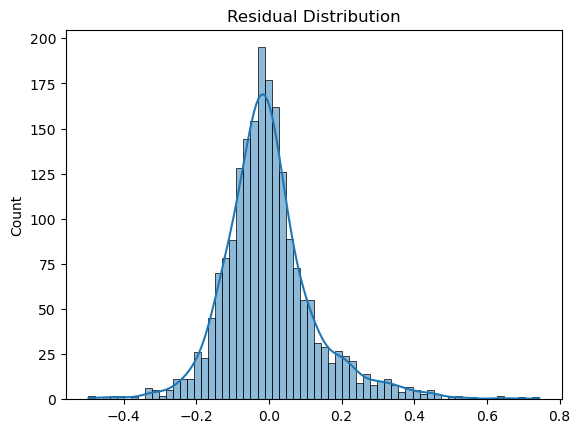

In [30]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算 R² 和 Adjusted R²
r2 = model.rsquared
adj_r2 = model.rsquared_adj
print(f"R²: {r2:.4f}, Adjusted R²: {adj_r2:.4f}")

# 计算 VIF（多重共线性）
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# 显著性检验（F-statistic）
print(f"F-statistic: {model.fvalue:.4f}, p-value: {model.f_pvalue:.4f}")

# 检查残差分布
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(model.resid, kde=True)
plt.title("Residual Distribution")
plt.show()


In [31]:
df_cleaned = df_cleaned.drop(columns=["communityname"])

In [32]:
from itertools import combinations
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. 预处理数据
X = df_cleaned.drop(columns=["ViolentCrimesPerPop", "population", "householdsize"])
y = df_cleaned["ViolentCrimesPerPop"]

In [33]:
!pip install mlxtend

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# 定义线性回归模型
model = LinearRegression()

# 前向选择（逐步添加特征）
sfs = SFS(model,
          forward=True,  # True: 逐步增加特征，False: 逐步剔除特征
          floating=False,
          scoring='r2',
          cv=5)  # 交叉验证次数

# 运行特征选择
sfs.fit(X, y)

# 输出最佳特征
best_features = list(sfs.k_feature_names_)
print(f"Best Subset Features: {best_features}")

Best Subset Features: ['PctKids2Par']


In [35]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 线性回归模型
model = LinearRegression()

# 设定 RFE 选择 10 个最佳特征
selector = RFE(model, n_features_to_select=10)
selector.fit(X, y)

# 获取最佳特征
selected_features = X.columns[selector.support_]
print(f"RFE Selected Features: {list(selected_features)}")

RFE Selected Features: ['MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'PctKids2Par', 'PctRecImmig5', 'PctRecImmig8', 'PersPerOccupHous', 'PctPersOwnOccup', 'OwnOccLowQuart', 'OwnOccMedVal']


In [37]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Best Subset Selection 模型
X_best = X[best_features]  # Best Subset 选出的特征
model_best = LinearRegression().fit(X_best, y)
y_pred_best = model_best.predict(X_best)

# RFE 模型
X_rfe = X[selected_features]  # RFE 选出的特征
model_rfe = LinearRegression().fit(X_rfe, y)
y_pred_rfe = model_rfe.predict(X_rfe)

# 计算 R² 和 MSE
r2_best = r2_score(y, y_pred_best)
mse_best = mean_squared_error(y, y_pred_best)

r2_rfe = r2_score(y, y_pred_rfe)
mse_rfe = mean_squared_error(y, y_pred_rfe)

print(f"Best Subset - R²: {r2_best:.4f}, MSE: {mse_best:.4f}")
print(f"RFE - R²: {r2_rfe:.4f}, MSE: {mse_rfe:.4f}")


Best Subset - R²: 0.5453, MSE: 0.0247
RFE - R²: 0.6069, MSE: 0.0213


In [39]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用交叉验证选择最佳 alpha
lasso = LassoCV(cv=5, max_iter=5000).fit(X_scaled, y)


# 选择非零系数对应的特征
lasso_features = X.columns[lasso.coef_ != 0]
print(f"Lasso Selected Features: {list(lasso_features)}")

# 计算 R² 和 MSE
y_pred_lasso = lasso.predict(X_scaled)
r2_lasso = r2_score(y, y_pred_lasso)
mse_lasso = mean_squared_error(y, y_pred_lasso)

print(f"Lasso - R²: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}")

Lasso Selected Features: ['state', 'fold', 'racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct65up', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctRecImmig8', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFull

In [40]:
from sklearn.linear_model import ElasticNetCV

# 使用交叉验证选择最佳 alpha 和 l1_ratio
elastic_net = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9]).fit(X_scaled, y)

# 选择非零系数对应的特征
elastic_net_features = X.columns[elastic_net.coef_ != 0]
print(f"Elastic Net Selected Features: {list(elastic_net_features)}")

# 计算 R² 和 MSE
y_pred_elastic = elastic_net.predict(X_scaled)
r2_elastic = r2_score(y, y_pred_elastic)
mse_elastic = mean_squared_error(y, y_pred_elastic)

print(f"Elastic Net - R²: {r2_elastic:.4f}, MSE: {mse_elastic:.4f}")

Elastic Net Selected Features: ['state', 'fold', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct65up', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctRecImmig8', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMor

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00945458727152726, tolerance: 0.008517425554858939
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009698193910494979, tolerance: 0.008517425554858939
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010470789391447965, tolerance: 0.008902159824561424
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordina

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.linear_model import ElasticNet
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000)
model_elastic.fit(X_scaled, y)
# 获取非零系数的特征（选中的特征）
elastic_features = X.columns[model_elastic.coef_ != 0]

# 计算 R² 和 MSE
y_pred_elastic = model_elastic.predict(X_scaled)
r2_elastic = r2_score(y, y_pred_elastic)
mse_elastic = mean_squared_error(y, y_pred_elastic)

# 输出结果
print(f"Elastic Net Selected Features: {list(elastic_features)}")
print(f"Elastic Net – R²: {r2_elastic:.4f}, MSE: {mse_elastic:.4f}")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 定义一系列的 alpha 值（正则化强度）
alphas = np.logspace(-4, 1, 50)  

# ========== Lasso Path ==========
lasso_coefs = []
for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=5000)
    model.fit(X_scaled, y)
    lasso_coefs.append(model.coef_)

lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(8, 5))
plt.plot(alphas, lasso_coefs)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Lasso Regularization Path")
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 定义一系列的 alpha 值（正则化强度）
alphas = np.logspace(-4, 1, 50)  

# ========== Elastic Net Path (Two alphas) ==========
elastic_coefs_1 = []
elastic_coefs_2 = []
alpha1, alpha2 = 0.01, 0.1  # 选取两个不同的 alpha

for alpha in alphas:
    model1 = ElasticNet(alpha=alpha1, l1_ratio=0.5, max_iter=5000)
    model2 = ElasticNet(alpha=alpha2, l1_ratio=0.5, max_iter=5000)
    
    model1.fit(X_scaled, y)
    model2.fit(X_scaled, y)
    
    elastic_coefs_1.append(model1.coef_)
    elastic_coefs_2.append(model2.coef_)

elastic_coefs_1 = np.array(elastic_coefs_1)
elastic_coefs_2 = np.array(elastic_coefs_2)

plt.figure(figsize=(10, 6))  # 增大图的尺寸
for i in range(min(10, X.shape[1])):  # 只绘制前10个特征，避免太多图例
    plt.plot(alphas, elastic_coefs_1[:, i], label=f'Alpha={alpha1}, Feature {i}')
    plt.plot(alphas, elastic_coefs_2[:, i], linestyle='dashed', label=f'Alpha={alpha2}, Feature {i}')

plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Elastic Net Regularization Path")

# **调整图例**
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=9, frameon=True)  # 图例放到图外
plt.grid(True)

# **调整布局，防止图例超出**
plt.tight_layout(rect=[0, 0, 0.75, 1])  # 让图例在右侧不超出边界

plt.show()

# ========== Ridge Path ==========
ridge_coefs = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_scaled, y)
    ridge_coefs.append(model.coef_)

ridge_coefs = np.array(ridge_coefs)

plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_coefs)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Ridge Regularization Path")
plt.grid(True)
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# 加载数据
X = df_cleaned.drop(columns=["ViolentCrimesPerPop"])
y = df_cleaned["ViolentCrimesPerPop"]

# 设置重复实验次数
n_iterations = 10
results = {"Least Squares": [], "Ridge": [], "Best Subset": [], "Stepwise RFE": [], "Lasso": [], "Elastic Net": []}

# 运行10次实验
for _ in range(n_iterations):
    # 拆分数据集 (60% train, 20% validation, 20% test)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=None)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None)

    #### 1. 最小二乘法 OLS ####
    model_ols = LinearRegression().fit(X_train, y_train)
    y_pred_ols = model_ols.predict(X_test)
    results["Least Squares"].append(mean_squared_error(y_test, y_pred_ols))

    #### 2. 岭回归 Ridge (超参数调优) ####
    best_alpha = min([0.01, 0.1, 1, 10, 100], key=lambda a: mean_squared_error(y_val, Ridge(alpha=a).fit(X_train, y_train).predict(X_val)))
    model_ridge = Ridge(alpha=best_alpha).fit(X_train, y_train)
    results["Ridge"].append(mean_squared_error(y_test, model_ridge.predict(X_test)))

    #### 3. 最优子集选择 Best Subsets ####
    sfs = SFS(LinearRegression(), k_features=10, forward=True, floating=False, scoring='neg_mean_squared_error', cv=5)
    sfs.fit(X_train, y_train)
    selected_features = list(sfs.k_feature_names_)
    model_best_subset = LinearRegression().fit(X_train[selected_features], y_train)
    results["Best Subset"].append(mean_squared_error(y_test, model_best_subset.predict(X_test[selected_features])))

    #### 4. 逐步回归 (RFE) ####
    selector = RFE(LinearRegression(), n_features_to_select=10)
    selector.fit(X_train, y_train)
    X_train_rfe, X_test_rfe = X_train.iloc[:, selector.support_], X_test.iloc[:, selector.support_]
    model_rfe = LinearRegression().fit(X_train_rfe, y_train)
    results["Stepwise RFE"].append(mean_squared_error(y_test, model_rfe.predict(X_test_rfe)))

    #### 5. Lasso 回归 (超参数调优) ####
    best_alpha = min([0.01, 0.1, 1, 10], key=lambda a: mean_squared_error(y_val, Lasso(alpha=a).fit(X_train, y_train).predict(X_val)))
    model_lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)
    results["Lasso"].append(mean_squared_error(y_test, model_lasso.predict(X_test)))

    #### 6. Elastic Net (超参数调优) ####
    best_alpha = min([0.01, 0.1, 1, 10], key=lambda a: mean_squared_error(y_val, ElasticNet(alpha=a, l1_ratio=0.5).fit(X_train, y_train).predict(X_val)))
    model_elastic = ElasticNet(alpha=best_alpha, l1_ratio=0.5).fit(X_train, y_train)
    results["Elastic Net"].append(mean_squared_error(y_test, model_elastic.predict(X_test)))

# 计算10次实验的平均MSE
avg_results = {method: np.mean(mse_list) for method, mse_list in results.items()}

# 显示结果
df_results = pd.DataFrame.from_dict(avg_results, orient="index", columns=["Mean Test MSE"])
print(df_results)

# 绘制柱状图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(df_results.index, df_results["Mean Test MSE"], color=['blue', 'red', 'green', 'purple', 'orange', 'cyan'])
plt.xlabel("Mean Test MSE (Lower is better)")
plt.title("Comparison of Linear Methods for Prediction")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Generate simulated data
np.random.seed(42)
X = np.random.rand(100, 2)  # Two features
y = 3 + 5 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100) * 0.5  # Linear relationship with noise

# Method 1: Standard OLS regression
X_ols = sm.add_constant(X)  # Add intercept term
model_ols = sm.OLS(y, X_ols).fit()
print("Standard OLS coefficients:", model_ols.params)

# Method 2: Centering X and y before regression
X_centered = X - np.mean(X, axis=0)
y_centered = y - np.mean(y)
model_centered = sm.OLS(y_centered, X_centered).fit()
print("Centered OLS coefficients (excluding intercept):", model_centered.params)

# Method 3: Adding a column of ones to X
X_augmented = np.column_stack((np.ones(X.shape[0]), X))
model_augmented = sm.OLS(y, X_augmented).fit()
print("OLS with added constant column:", model_augmented.params)



In [45]:
from sklearn.linear_model import ElasticNet
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000)
model_elastic.fit(X_scaled, y)

ElasticNet(alpha=0.1, max_iter=5000)

In [46]:
# 获取非零系数的特征（选中的特征）
elastic_features = X.columns[model_elastic.coef_ != 0]

# 计算 R² 和 MSE
y_pred_elastic = model_elastic.predict(X_scaled)
r2_elastic = r2_score(y, y_pred_elastic)
mse_elastic = mean_squared_error(y, y_pred_elastic)

# 输出结果
print(f"Elastic Net Selected Features: {list(elastic_features)}")
print(f"Elastic Net – R²: {r2_elastic:.4f}, MSE: {mse_elastic:.4f}")

Elastic Net Selected Features: ['racePctWhite', 'PctKids2Par', 'PctIlleg', 'HousVacant']
Elastic Net – R²: 0.5513, MSE: 0.0243


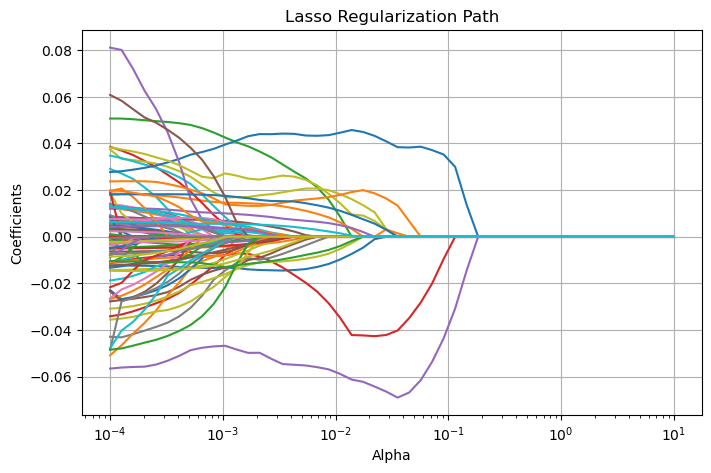

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 定义一系列的 alpha 值（正则化强度）
alphas = np.logspace(-4, 1, 50)  

# ========== Lasso Path ==========
lasso_coefs = []
for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=5000)
    model.fit(X_scaled, y)
    lasso_coefs.append(model.coef_)

lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(8, 5))
plt.plot(alphas, lasso_coefs)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Lasso Regularization Path")
plt.grid(True)
plt.show()

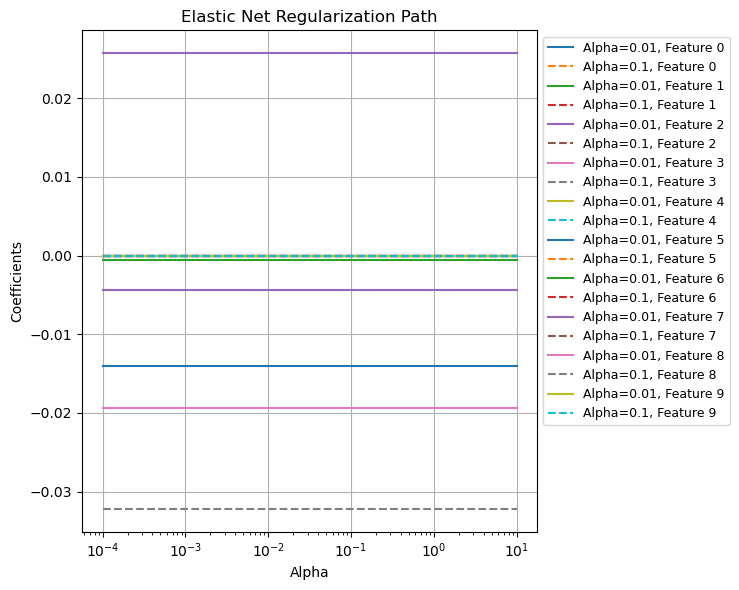

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 定义一系列的 alpha 值（正则化强度）
alphas = np.logspace(-4, 1, 50)  

# ========== Elastic Net Path (Two alphas) ==========
elastic_coefs_1 = []
elastic_coefs_2 = []
alpha1, alpha2 = 0.01, 0.1  # 选取两个不同的 alpha

for alpha in alphas:
    model1 = ElasticNet(alpha=alpha1, l1_ratio=0.5, max_iter=5000)
    model2 = ElasticNet(alpha=alpha2, l1_ratio=0.5, max_iter=5000)
    
    model1.fit(X_scaled, y)
    model2.fit(X_scaled, y)
    
    elastic_coefs_1.append(model1.coef_)
    elastic_coefs_2.append(model2.coef_)

elastic_coefs_1 = np.array(elastic_coefs_1)
elastic_coefs_2 = np.array(elastic_coefs_2)

plt.figure(figsize=(10, 6))  # 增大图的尺寸
for i in range(min(10, X.shape[1])):  # 只绘制前10个特征，避免太多图例
    plt.plot(alphas, elastic_coefs_1[:, i], label=f'Alpha={alpha1}, Feature {i}')
    plt.plot(alphas, elastic_coefs_2[:, i], linestyle='dashed', label=f'Alpha={alpha2}, Feature {i}')

plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Elastic Net Regularization Path")

# **调整图例**
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=9, frameon=True)  # 图例放到图外
plt.grid(True)

# **调整布局，防止图例超出**
plt.tight_layout(rect=[0, 0, 0.75, 1])  # 让图例在右侧不超出边界

plt.show()


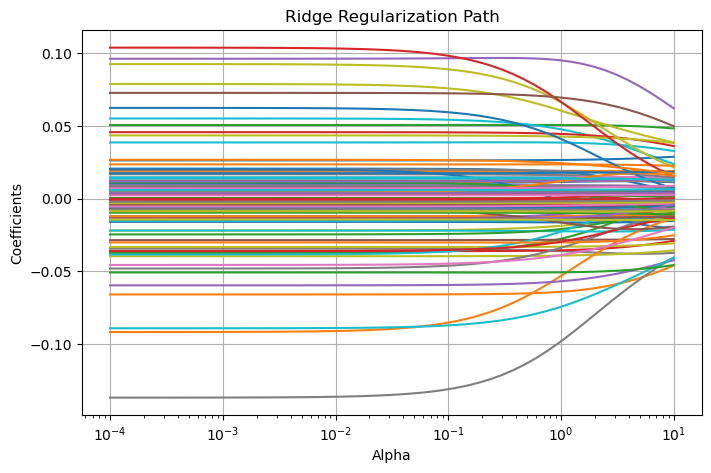

In [51]:
# ========== Ridge Path ==========
ridge_coefs = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_scaled, y)
    ridge_coefs.append(model.coef_)

ridge_coefs = np.array(ridge_coefs)

plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_coefs)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Ridge Regularization Path")
plt.grid(True)
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# 加载数据
X = df_cleaned.drop(columns=["ViolentCrimesPerPop"])
y = df_cleaned["ViolentCrimesPerPop"]



In [54]:
# 设置重复实验次数
n_iterations = 10
results = {"Least Squares": [], "Ridge": [], "Best Subset": [], "Stepwise RFE": [], "Lasso": [], "Elastic Net": []}

               Mean Test MSE
Least Squares       0.017993
Ridge               0.017295
Best Subset         0.017943
Stepwise RFE        0.019930
Lasso               0.022383
Elastic Net         0.019634


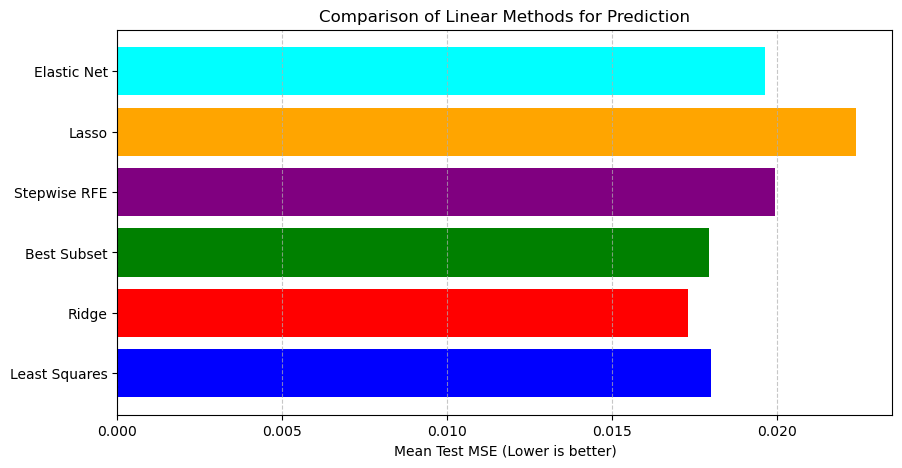

In [59]:
# 运行10次实验
for _ in range(n_iterations):
    # 拆分数据集 (60% train, 20% validation, 20% test)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=None)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None)

    #### 1. 最小二乘法 OLS ####
    model_ols = LinearRegression().fit(X_train, y_train)
    y_pred_ols = model_ols.predict(X_test)
    results["Least Squares"].append(mean_squared_error(y_test, y_pred_ols))

    #### 2. 岭回归 Ridge (超参数调优) ####
    best_alpha = min([0.01, 0.1, 1, 10, 100], key=lambda a: mean_squared_error(y_val, Ridge(alpha=a).fit(X_train, y_train).predict(X_val)))
    model_ridge = Ridge(alpha=best_alpha).fit(X_train, y_train)
    results["Ridge"].append(mean_squared_error(y_test, model_ridge.predict(X_test)))

    #### 3. 最优子集选择 Best Subsets ####
    sfs = SFS(LinearRegression(), k_features=10, forward=True, floating=False, scoring='neg_mean_squared_error', cv=5)
    sfs.fit(X_train, y_train)
    selected_features = list(sfs.k_feature_names_)
    model_best_subset = LinearRegression().fit(X_train[selected_features], y_train)
    results["Best Subset"].append(mean_squared_error(y_test, model_best_subset.predict(X_test[selected_features])))

    #### 4. 逐步回归 (RFE) ####
    selector = RFE(LinearRegression(), n_features_to_select=10)
    selector.fit(X_train, y_train)
    X_train_rfe, X_test_rfe = X_train.iloc[:, selector.support_], X_test.iloc[:, selector.support_]
    model_rfe = LinearRegression().fit(X_train_rfe, y_train)
    results["Stepwise RFE"].append(mean_squared_error(y_test, model_rfe.predict(X_test_rfe)))

    #### 5. Lasso 回归 (超参数调优) ####
    best_alpha = min([0.01, 0.1, 1, 10], key=lambda a: mean_squared_error(y_val, Lasso(alpha=a).fit(X_train, y_train).predict(X_val)))
    model_lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)
    results["Lasso"].append(mean_squared_error(y_test, model_lasso.predict(X_test)))

    #### 6. Elastic Net (超参数调优) ####
    best_alpha = min([0.01, 0.1, 1, 10], key=lambda a: mean_squared_error(y_val, ElasticNet(alpha=a, l1_ratio=0.5).fit(X_train, y_train).predict(X_val)))
    model_elastic = ElasticNet(alpha=best_alpha, l1_ratio=0.5).fit(X_train, y_train)
    results["Elastic Net"].append(mean_squared_error(y_test, model_elastic.predict(X_test)))

# 计算10次实验的平均MSE
avg_results = {method: np.mean(mse_list) for method, mse_list in results.items()}

# 显示结果
df_results = pd.DataFrame.from_dict(avg_results, orient="index", columns=["Mean Test MSE"])
print(df_results)

# 绘制柱状图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(df_results.index, df_results["Mean Test MSE"], color=['blue', 'red', 'green', 'purple', 'orange', 'cyan'])
plt.xlabel("Mean Test MSE (Lower is better)")
plt.title("Comparison of Linear Methods for Prediction")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [61]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Generate simulated data
np.random.seed(42)
X = np.random.rand(100, 2)  # Two features
y = 3 + 5 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100) * 0.5  # Linear relationship with noise

# Method 1: Standard OLS regression
X_ols = sm.add_constant(X)  # Add intercept term
model_ols = sm.OLS(y, X_ols).fit()
print("Standard OLS coefficients:", model_ols.params)

# Method 2: Centering X and y before regression
X_centered = X - np.mean(X, axis=0)
y_centered = y - np.mean(y)
model_centered = sm.OLS(y_centered, X_centered).fit()
print("Centered OLS coefficients (excluding intercept):", model_centered.params)

# Method 3: Adding a column of ones to X
X_augmented = np.column_stack((np.ones(X.shape[0]), X))
model_augmented = sm.OLS(y, X_augmented).fit()
print("OLS with added constant column:", model_augmented.params)


Standard OLS coefficients: [2.88613613 5.16933339 2.17747302]
Centered OLS coefficients (excluding intercept): [5.16933339 2.17747302]
OLS with added constant column: [2.88613613 5.16933339 2.17747302]


In [62]:
# Generate data where p > n
n, p = 5, 10  # More features than samples
X_high_dim = np.random.rand(n, p)
y_high_dim = np.random.rand(n)

# Train OLS regression
model_high_dim = LinearRegression().fit(X_high_dim, y_high_dim)
y_pred = model_high_dim.predict(X_high_dim)

# Compute training error
train_error = np.mean((y_high_dim - y_pred) ** 2)
print("Training error (p > n):", train_error)

Training error (p > n): 7.519446800469972e-30


OLS coefficients for correlated variables: [  2.93794859  21.78323191 -14.72114998]


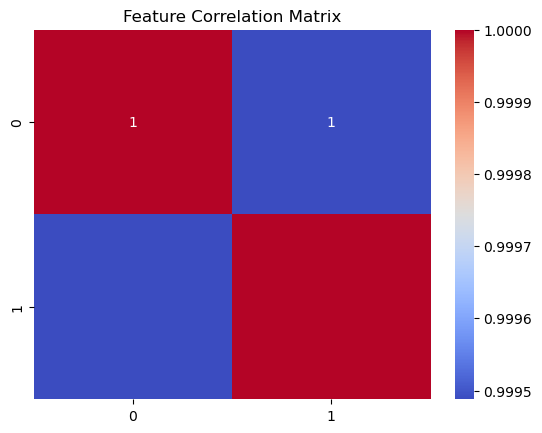

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate highly correlated features
X_corr = np.random.rand(100, 1)
X_corr = np.hstack([X_corr, X_corr + np.random.normal(0, 0.01, (100, 1))])  # Highly correlated
y_corr = 3 + 5 * X_corr[:, 0] + 2 * X_corr[:, 1] + np.random.randn(100) * 0.5

# OLS regression
model_corr = sm.OLS(y_corr, sm.add_constant(X_corr)).fit()
print("OLS coefficients for correlated variables:", model_corr.params)

# Visualize feature correlation
sns.heatmap(np.corrcoef(X_corr.T), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [64]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10).fit(X_corr, y_corr)
print("Ridge regression coefficients:", ridge_model.coef_)


Ridge regression coefficients: [2.33963262 2.32861972]


In [65]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1).fit(X_corr, y_corr)
print("Lasso regression coefficients:", lasso_model.coef_)


Lasso regression coefficients: [6.01822711 0.        ]
